## Analysis of Student Performance by Study Time and School

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def load_and_prepare_data(filepath):
    return pd.read_csv(filepath, delimiter=';')

In [2]:
    data_path = "student-mat.csv"
    student_data = load_and_prepare_data(data_path)

In [3]:
student_data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [4]:
def plot_student_performance(data):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x='studytime', y='G3', hue='school', palette='viridis', s=100)
    
    plt.title('Student Performance vs. Weekly Study Time by School')
    plt.xlabel('Weekly Study Time (1: <2 hours, 2: 2 to 5 hours, 3: 5 to 10 hours, 4: >10 hours)')
    plt.ylabel('Final Grade (G3)')
    plt.legend(title='School',loc='upper left', bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.show()

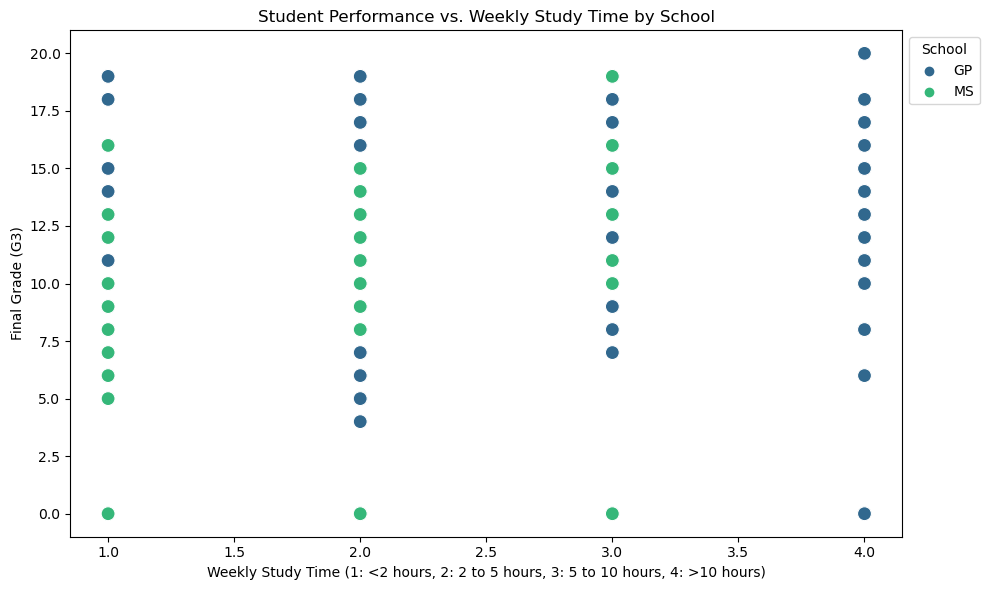

In [5]:
plot_student_performance(student_data)

In [6]:
def plot_internet_access_vs_performance(data):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data, x='internet', y='G3', hue='school', palette='Set2')
    
    plt.title('Impact of Internet Access on Student Final Grades')
    plt.xlabel('Internet Access at Home')
    plt.ylabel('Final Grade (G3)')
    plt.xticks([0, 1], ['No', 'Yes'])
    
    plt.legend(title='School')

    plt.tight_layout()
    plt.show()

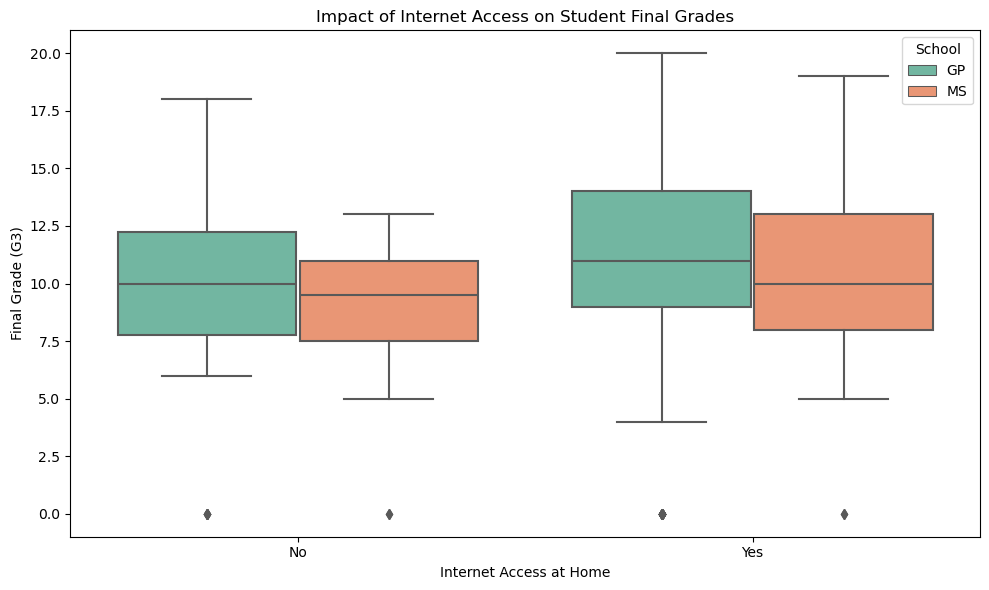

In [7]:
plot_internet_access_vs_performance(student_data)

### Legend Explanation
#### figure1
- **Blue points**: Students from Gabriel Pereira (GP)
- **Green points**: Students from Mousinho da Silveira (MS)
#### figure2
- **Green box**:Students from Gabriel Pereira (GP)
- **Orange box**:Students from Mousinho da Silveira (MS)

### Findings
- Students from both schools show a general trend where more study time correlates with higher grades.
- The variance in grades appears larger for students with higher study times.
- Students from Mousinho da Silveira (MS) generally spend fewer time on study.
- Student who can access internet have higher average score than those who dont.
- GP have better average score than MS

#### Insights
This visualization helps in understanding how the amount of study time and whether student can access internet impact academic performance.

C:\Users\15858\AppData\Local\Temp\ipykernel_25112\1726051942.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='Dalc', y='G3', hue='school', ci=None)


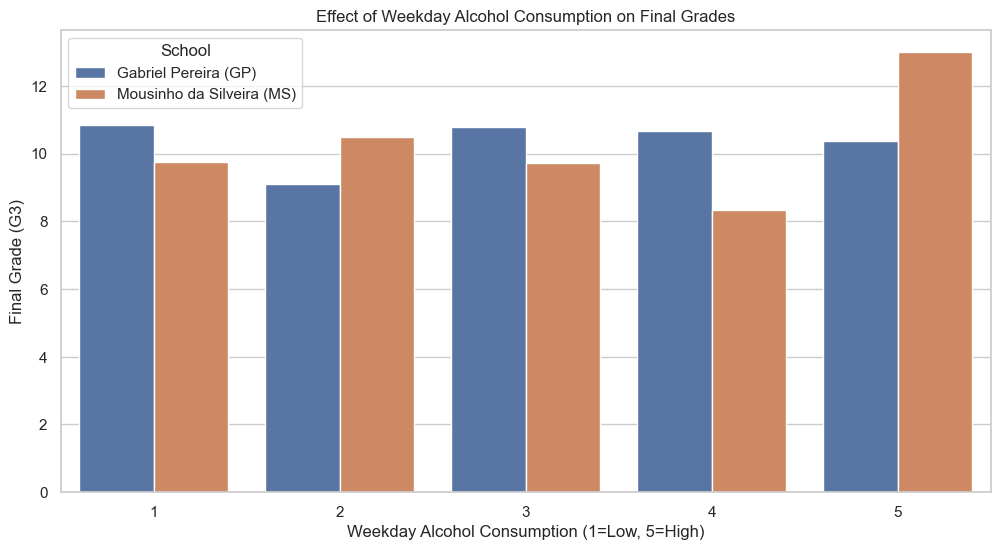

C:\Users\15858\AppData\Local\Temp\ipykernel_25112\1726051942.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='Medu', y='G3', hue='school', ci=None)


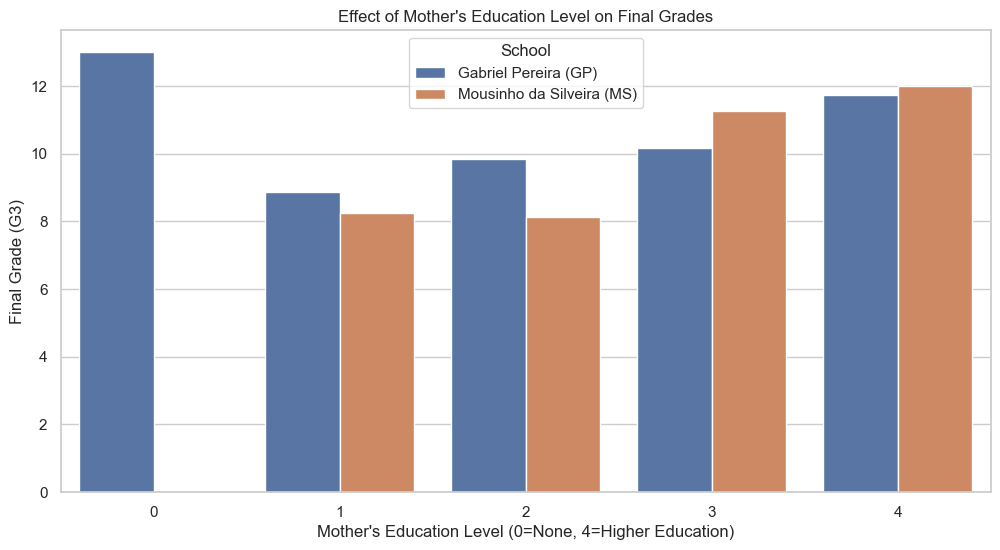

In [8]:
data = student_data

# Separate data for the two schools
gp_data = data[data['school'] == 'GP']
ms_data = data[data['school'] == 'MS']

# Set up the plotting style
sns.set(style="whitegrid")

# Idea 2: Effect of Alcohol Consumption on Grades
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='Dalc', y='G3', hue='school', ci=None)
plt.title('Effect of Weekday Alcohol Consumption on Final Grades')
plt.xlabel('Weekday Alcohol Consumption (1=Low, 5=High)')
plt.ylabel('Final Grade (G3)')
plt.legend(title='School', labels=['Gabriel Pereira (GP)', 'Mousinho da Silveira (MS)'])
plt.show()

# Idea 3: Parental Education and Grades
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='Medu', y='G3', hue='school', ci=None)
plt.title('Effect of Mother\'s Education Level on Final Grades')
plt.xlabel('Mother\'s Education Level (0=None, 4=Higher Education)')
plt.ylabel('Final Grade (G3)')
plt.legend(title='School', labels=['Gabriel Pereira (GP)', 'Mousinho da Silveira (MS)'])
plt.show()

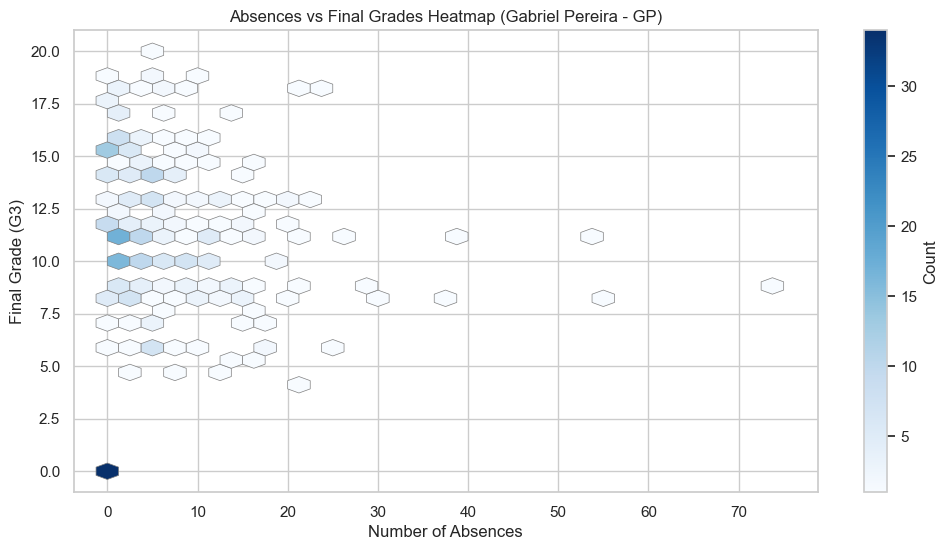

In [13]:
plt.figure(figsize=(12, 6))
hb_gp = plt.hexbin(gp_data['absences'], gp_data['G3'], gridsize=30, cmap='Blues', mincnt=1, linewidths=0.5, edgecolors='grey')
plt.colorbar(hb_gp, label='Count')
plt.title('Absences vs Final Grades Heatmap (Gabriel Pereira - GP)')
plt.xlabel('Number of Absences')
plt.ylabel('Final Grade (G3)')
plt.show()

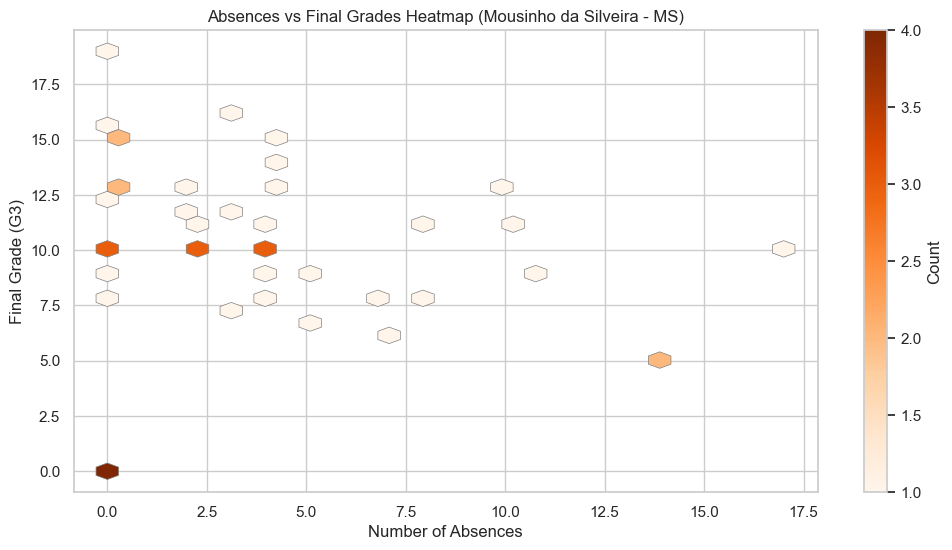

In [14]:
plt.figure(figsize=(12, 6))
hb_ms = plt.hexbin(ms_data['absences'], ms_data['G3'], gridsize=30, cmap='Oranges', mincnt=1, linewidths=0.5, edgecolors='grey')
plt.colorbar(hb_ms, label='Count')
plt.title('Absences vs Final Grades Heatmap (Mousinho da Silveira - MS)')
plt.xlabel('Number of Absences')
plt.ylabel('Final Grade (G3)')
plt.show()